In [25]:
#Dependencies and Setup
import matplotlib as plt
import pandas as pd
import numpy as np
import json
from sodapy import Socrata
client = Socrata("data.cdc.gov", None)

#Read file and store into data frame

results = client.get("8pt5-q6wp", limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df
us_by_age_trim_df['week'] = us_by_age_df['week'].astype(int)

NameError: name 'us_by_age_df' is not defined

Gender Demographics:
*Total of Gender data entries
*Total of females
*Total of males
*The average of each value of week set by gender
(could not do by state - group data was only given United States)

In [26]:
#create gender list to pull gender information only
#https://www.youtube.com/watch?v=3Kl5oaT0dP0
genderdata_df = results_df.loc[(results_df["group"] == "By Gender")]
genderdata_df
#print(genderdata_df)

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
8,Symptoms of Depressive Disorder,By Gender,United States,Male,1,Apr 23 - May 5,20.8,19.6,22,19.6 - 22.0,NaN
9,Symptoms of Depressive Disorder,By Gender,United States,Female,1,Apr 23 - May 5,26.1,25.2,27.1,25.2 - 27.1,NaN
78,Symptoms of Anxiety Disorder,By Gender,United States,Male,1,Apr 23 - May 5,26.1,24.7,27.5,24.7 - 27.5,NaN
79,Symptoms of Anxiety Disorder,By Gender,United States,Female,1,Apr 23 - May 5,35.4,34.5,36.3,34.5 - 36.3,NaN
148,Symptoms of Anxiety Disorder or Depressive Dis...,By Gender,United States,Male,1,Apr 23 - May 5,31,29.6,32.3,29.6 - 32.3,NaN
149,Symptoms of Anxiety Disorder or Depressive Dis...,By Gender,United States,Female,1,Apr 23 - May 5,40.7,39.7,41.6,39.7 - 41.6,NaN
218,Symptoms of Depressive Disorder,By Gender,United States,Male,2,May 7 - May 12,22.3,20.6,24,20.6 - 24.0,NaN
219,Symptoms of Depressive Disorder,By Gender,United States,Female,2,May 7 - May 12,25.8,24.7,27,24.7 - 27.0,NaN
288,Symptoms of Anxiety Disorder,By Gender,United States,Male,2,May 7 - May 12,26.7,24.9,28.5,24.9 - 28.5,NaN
289,Symptoms of Anxiety Disorder,By Gender,United States,Female,2,May 7 - May 12,33.1,32,34.2,32.0 - 34.2,NaN


In [27]:
labels = 'Male Average 27.2%','Female Average 30.1%'
sizes = [40, 60]
colors = ['plum', 'c']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        shadow=True, startangle=140)

plt.axis('equal')
plt.show()
# plt_pie =genderdata_df.plot.pie(subplot="True", figsize=(6,6),startangle=55, colors = colors,  explode = explode)
# plt.axis("equal",fontsize = 14)


AttributeError: module 'matplotlib' has no attribute 'pie'

In [4]:
genderdata_df.groupby("group").count()

,indicator,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
group,,,,,,,,,,
By Gender,58,58,58,58,58,58,58,58,58,0


In [5]:
#Create female df
femalegender_df = genderdata_df.loc[(genderdata_df["subgroup"] == "Female")]
femalegender_df.head(3)                                     

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
9,Symptoms of Depressive Disorder,By Gender,United States,Female,1,Apr 23 - May 5,26.1,25.2,27.1,25.2 - 27.1,NaN
79,Symptoms of Anxiety Disorder,By Gender,United States,Female,1,Apr 23 - May 5,35.4,34.5,36.3,34.5 - 36.3,NaN
149,Symptoms of Anxiety Disorder or Depressive Dis...,By Gender,United States,Female,1,Apr 23 - May 5,40.7,39.7,41.6,39.7 - 41.6,NaN


In [6]:
#how many females
femalegender_df.count()["subgroup"]

29

In [28]:
#Find the average of values for females through each week label set so Jessica can graph
femalegender_df['week'] = femalegender_df['week'].astype(int)
femalegender_df['value']=femalegender_df['value'].astype(float)
femalegender_df.groupby('week').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,value
week,
1,34.066667
2,32.033333
3,32.133333
4,32.733333
5,34.000000
6,34.300000
7,33.600000
8,33.900000
9,35.666667


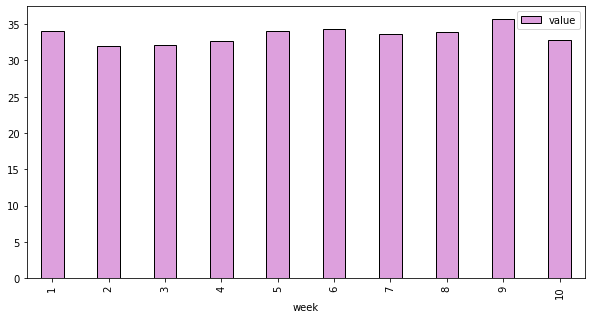

In [29]:
#female weekly average
genderdata_df.groupby("group").count()
fg_df = femalegender_df.groupby('week').mean()
fg_df

fg_df.plot(kind="bar",width = (.40),figsize=(10, 5), color="plum", edgeColor=('black'), linestyle='-')

In [30]:
#Create male data only
malegender_df = genderdata_df.loc[(genderdata_df["subgroup"] == "Male")]
malegender_df.head(3) 

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
8,Symptoms of Depressive Disorder,By Gender,United States,Male,1,Apr 23 - May 5,20.8,19.6,22,19.6 - 22.0,NaN
78,Symptoms of Anxiety Disorder,By Gender,United States,Male,1,Apr 23 - May 5,26.1,24.7,27.5,24.7 - 27.5,NaN
148,Symptoms of Anxiety Disorder or Depressive Dis...,By Gender,United States,Male,1,Apr 23 - May 5,31,29.6,32.3,29.6 - 32.3,NaN


In [31]:
#how many males
malegender_df.count()["subgroup"]
malegender_df.head(3)
malegender_df['week'] = malegender_df['week'].astype(int)
malegender_df['value']=malegender_df['value'].astype(float)
malegender_df.groupby('week').mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,value
week,
1,25.966667
2,26.800000
3,25.400000
4,26.133333
5,26.700000
6,27.466667
7,28.033333
8,27.866667
9,29.266667


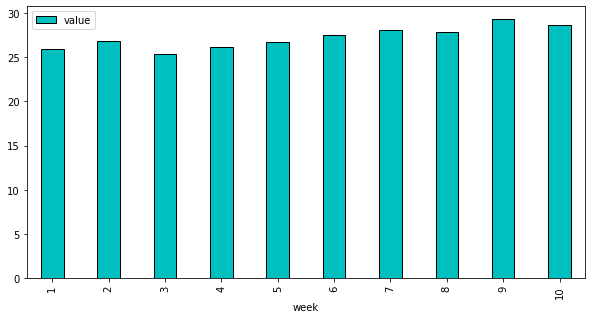

In [15]:
# chart for male weekly percentage
genderdata_df.groupby("group").count()
mg_df = malegender_df.groupby('week').mean()
mg_df

mg_df.plot(kind="bar",width = (.40),figsize=(10, 5), color="c", edgeColor=('black'), linestyle='-')
